In [16]:
!pip install scikeras

In [17]:
import os
import csv
import pickle
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from numpy import mean, array, std
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.constraints import MaxNorm
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU,ELU, Dropout
from sklearn.metrics import accuracy_score, matthews_corrcoef, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score,StratifiedKFold, train_test_split, train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
churn_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Assignment 3/CustomerChurn_dataset.csv")
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
null_columns = churn_data.columns[churn_data.isnull().any()]
null_columns

Index([], dtype='object')

In [22]:
numeric_data = churn_data.select_dtypes(exclude = ["object"])
numeric_data

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [23]:
categorical_data = churn_data.select_dtypes(include = ["object"])
categorical_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [24]:
from pandas.core.arrays import categorical

In [25]:
# encoding each categorical column
label_encoder = LabelEncoder()
for column in categorical_data:
    if categorical_data[column].dtype == "object":
        categorical_data[column] = label_encoder.fit_transform(categorical_data[column])
categorical_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,1525,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,3367,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,5934,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1


In [26]:
# combining both the numeric and encoded categorical datasets
combined_churn_data = pd.concat([numeric_data, categorical_data], axis = 1)
combined_churn_data

,SeniorCitizen,tenure,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,29.85,5375,0,1,0,0,1,0,...,2,0,0,0,0,0,1,2,2505,0
1,0,34,56.95,3962,1,0,0,1,0,0,...,0,2,0,0,0,1,0,3,1466,0
2,0,2,53.85,2564,1,0,0,1,0,0,...,2,0,0,0,0,0,1,3,157,1
3,0,45,42.30,5535,1,0,0,0,1,0,...,0,2,2,0,0,1,0,0,1400,0
4,0,2,70.70,6511,0,0,0,1,0,1,...,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,4853,1,1,1,1,2,0,...,0,2,2,2,2,1,1,3,1597,0
7039,0,72,103.20,1525,0,1,1,1,2,1,...,2,2,0,2,2,1,1,1,5698,0
7040,0,11,29.60,3367,0,1,1,0,1,0,...,0,0,0,0,0,0,1,2,2994,0
7041,1,4,74.40,5934,1,1,0,1,2,1,...,0,0,0,0,0,0,1,3,2660,1


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
!pip install matplotlib seaborn

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Split the data into features (X) and target variable (Y)
X_data = combined_churn_data.drop("Churn", axis = 1)
Y_data = combined_churn_data["Churn"]

In [31]:
# Scaling the independent variables / features
SS = StandardScaler()
scaled_X_data = SS.fit_transform(X_data)
scaled_X_data = pd.DataFrame(scaled_X_data, columns = X_data.columns)
scaled_X_data

,SeniorCitizen,tenure,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,-0.439916,-1.277445,-1.160323,0.911890,-1.009559,1.034530,-0.654012,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.398608
1,-0.439916,0.066327,-0.259629,0.216906,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.948762
2,-0.439916,-1.236724,-0.362660,-0.470701,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-1.641883
3,-0.439916,0.514251,-0.746535,0.990587,0.990532,-0.966622,-0.654012,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.983710
4,-0.439916,-1.236724,0.197365,1.470632,-1.009559,-0.966622,-0.654012,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,0.655145,0.990532,1.034530,1.529024,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,-0.879397
7039,-0.439916,1.613701,1.277533,-0.981733,-1.009559,1.034530,1.529024,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.292099
7040,-0.439916,-0.870241,-1.168632,-0.075745,-1.009559,1.034530,1.529024,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.139680
7041,2.273159,-1.155283,0.320338,1.186835,0.990532,1.034530,-0.654012,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.316534


In [32]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [33]:
# Split the data into training and testing sets (if necessary)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [34]:
# Create a tree-based model (Random Forest in this example)
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [35]:
# RFECV object
rfecv = RFECV(estimator = model, step = 1, cv = 3, scoring = "accuracy")
rfecv.fit(X_train, Y_train)

RFECV(cv=3, estimator=RandomForestClassifier(random_state=42),
      scoring='accuracy')

In [36]:
# selected features
selected_features = X_train.columns[rfecv.support_]
selected_features

Index(['tenure', 'MonthlyCharges', 'customerID', 'gender', 'Partner',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [37]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
selected_features = X_data.columns[support_mask]
selected_features

Index(['tenure', 'MonthlyCharges', 'customerID', 'gender', 'Partner',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [38]:
import pickle

# Loading the saved scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(SS, scaler_file)

In [39]:
import seaborn as sns
import pandas as pd

In [40]:
# Combine X_data and Y_data into a single DataFrame for convenience
eda_data = pd.concat([X_data, Y_data], axis=1)

In [41]:
# Chosen features
selected_features = ['customerID', 'gender', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                     'tenure', 'MonthlyCharges', 'TotalCharges']

In [42]:
# Set overall style and font scale
sns.set_style("ticks")
sns.set(font_scale=1.2)

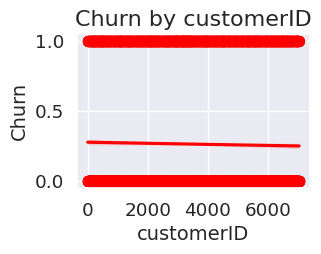

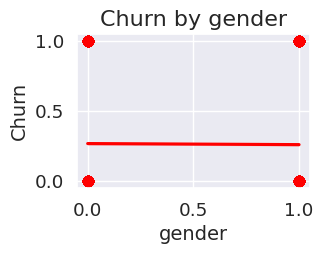

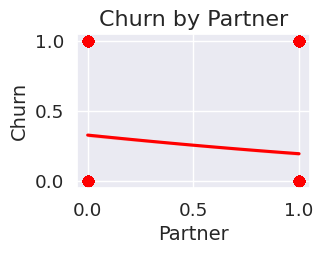

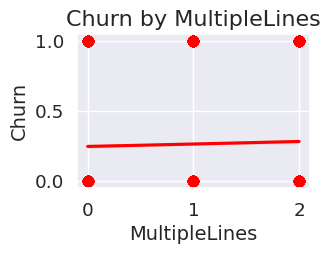

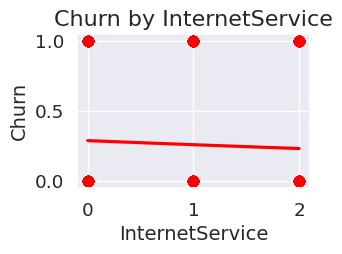

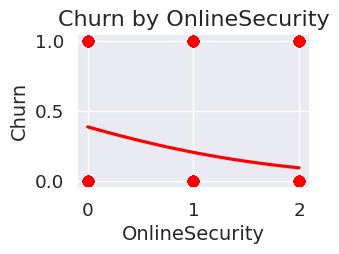

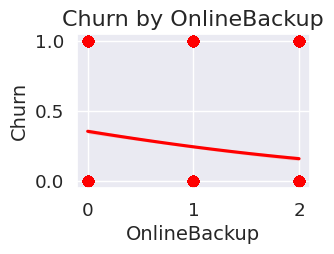

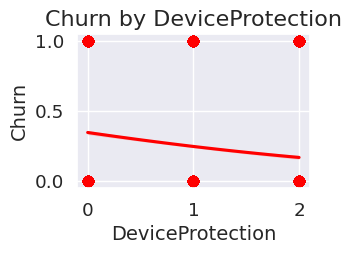

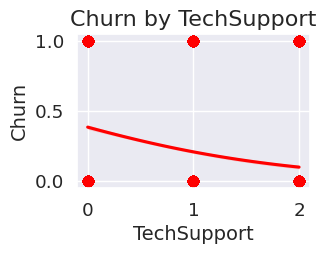

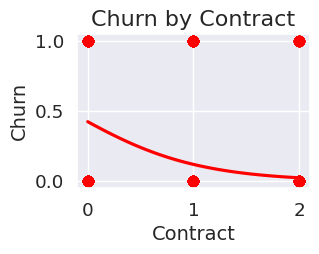

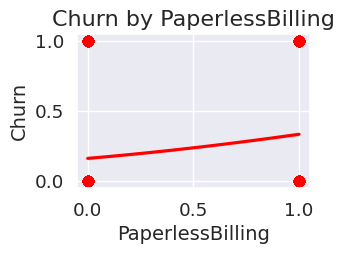

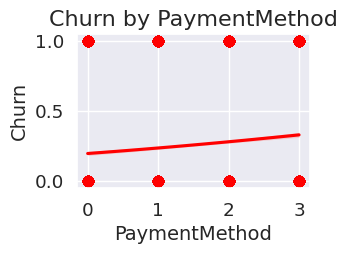

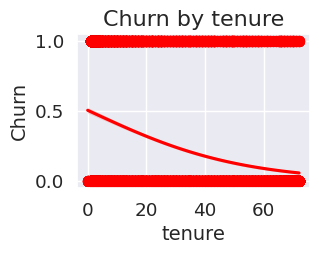

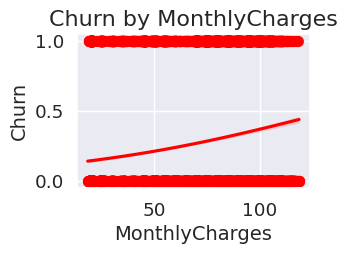

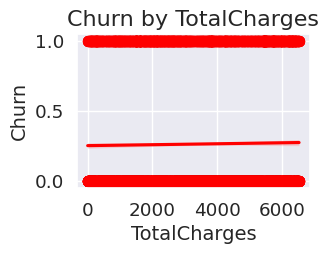

In [43]:
# Visualize the relationship between features and Y_data
for feature in selected_features:
    # Create a new figure with specified size
    plt.figure(figsize=(3, 2))

    # Plot the regression line with logistic fit
    sns.regplot(x=feature, y="Churn", data=eda_data, logistic=True, color='red', scatter_kws={'s': 50})

    # Set plot title
    plt.title(f"Churn by {feature}", fontsize=16)

    # Set x and y-axis labels
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Churn", fontsize=14)

In [44]:
# Show the plot
plt.show()

In [45]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [46]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 42)

In [47]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation = "relu")(input_layer)
hidden_layer_2 = Dense(24, activation = "relu")(hidden_layer_1)
hidden_layer_3 = Dense(12, activation = "relu")(hidden_layer_2)
output_layer = Dense(1, activation = "sigmoid")(hidden_layer_3)

model = Model(inputs = input_layer, outputs = output_layer)

In [48]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(X_train, Y_train, epochs = 150, batch_size = 32, validation_data = (X_test, Y_test))

Epoch 1/150
177/177 [==============================] - 2s 6ms/step - loss: 131.6339 - accuracy: 0.4148 - val_loss: 12.2633 - val_accuracy: 0.5489
Epoch 2/150
177/177 [==============================] - 1s 4ms/step - loss: 3.3809 - accuracy: 0.5999 - val_loss: 1.5548 - val_accuracy: 0.6894
Epoch 3/150
177/177 [==============================] - 1s 4ms/step - loss: 1.3614 - accuracy: 0.6480 - val_loss: 1.1456 - val_accuracy: 0.6170
Epoch 4/150
177/177 [==============================] - 1s 4ms/step - loss: 1.1266 - accuracy: 0.6550 - val_loss: 0.9338 - val_accuracy: 0.7404
Epoch 5/150
177/177 [==============================] - 2s 9ms/step - loss: 1.0286 - accuracy: 0.6635 - val_loss: 0.8678 - val_accuracy: 0.6099
Epoch 6/150
177/177 [==============================] - 1s 6ms/step - loss: 0.9064 - accuracy: 0.6711 - val_loss: 0.6961 - val_accuracy: 0.7234
Epoch 7/150
177/177 [==============================] - 1s 4ms/step - loss: 0.8653 - accuracy: 0.6766 - val_loss: 0.6750 - val_accuracy: 0.6

In [49]:
_, accuracy = model.evaluate(X_train, Y_train)
accuracy * 100

177/177 [==============================] - 0s 2ms/step - loss: 0.9289 - accuracy: 0.7403


74.03265833854675

In [50]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.4f}')

23/23 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.7560
Test Loss: 0.8345
Test Accuracy: 75.6028


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Define a function to create your Keras model with the Functional API
def create_model(optimizer=Adam(learning_rate = 0.0001), hidden_layer_sizes = (32, 24, 12), dropout_rate = 0.0):
    input_layer = Input(shape = (X_train[selected_features].shape[1],))
    hidden_layer_1 = Dense(hidden_layer_sizes[0], activation = "relu")(input_layer)
    dropout_1 = Dropout(dropout_rate)(hidden_layer_1)
    hidden_layer_2 = Dense(hidden_layer_sizes[1], activation = "relu")(dropout_1)
    dropout_2 = Dropout(dropout_rate)(hidden_layer_2)
    hidden_layer_3 = Dense(hidden_layer_sizes[2], activation = "relu")(dropout_2)
    dropout_3 = Dropout(dropout_rate)(hidden_layer_3)
    output_layer = Dense(1, activation = "sigmoid")(dropout_3)

    model = Model(inputs = input_layer, outputs = output_layer)
    model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [53]:
# Create a KerasClassifier based on your model
keras_classifier = KerasClassifier(build_fn = create_model, verbose = 0, hidden_layer_sizes = (32, 24, 12))

In [54]:
# Define the parameter grid to search
param_grid = {
    'optimizer': [Adam(learning_rate=0.001)],
    'hidden_layer_sizes': [(64, 32, 16)],
    'batch_size': [32, 64],
    'epochs': [20, 25, 50, 100]
}

In [55]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = keras_classifier, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs = -1)

In [56]:
# Fit the grid search to the data
grid_result = grid_search.fit(X_train[selected_features], Y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [57]:
# Print the best parameters and best score
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

Best Parameters: {'batch_size': 64, 'epochs': 50, 'hidden_layer_sizes': (64, 32, 16), 'optimizer': <keras.src.optimizers.adam.Adam object at 0x7c9648677070>}
Best Score: 0.7463613773517928


In [58]:
# Get the best parameters from the grid search
best_params = grid_result.best_params_

In [59]:
# Extracting the dropout_rate from best_params with a default value of 0.0
dropout_rate = best_params.get("dropout_rate", 0.0)

In [60]:
# Create the final model with the best parameters, including dropout_rate
final_model = create_model(
    optimizer = best_params["optimizer"],
    hidden_layer_sizes = best_params["hidden_layer_sizes"],
    dropout_rate = dropout_rate
)

In [61]:
# Train the model with the best parameters
final_model.fit(
    X_train[selected_features], Y_train,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    verbose=1
)

Epoch 1/50
89/89 [==============================] - 1s 2ms/step - loss: 4.6699 - accuracy: 0.6573
Epoch 2/50
89/89 [==============================] - 0s 3ms/step - loss: 0.8024 - accuracy: 0.6809
Epoch 3/50
89/89 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.6961
Epoch 4/50
89/89 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.7217
Epoch 5/50
89/89 [==============================] - 0s 4ms/step - loss: 0.7770 - accuracy: 0.7078
Epoch 6/50
89/89 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.7188
Epoch 7/50
89/89 [==============================] - 0s 4ms/step - loss: 0.9757 - accuracy: 0.6972
Epoch 8/50
89/89 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.7362
Epoch 9/50
89/89 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.7341
Epoch 10/50
89/89 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.7341
Epoch 11/50
89/89 [

In [62]:
# Save the trained model
final_model.save("final_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [64]:
# Evaluate on the test set
y_pred_test = final_model.predict(X_test[selected_features])
test_auc = roc_auc_score(Y_test, y_pred_test)
test_accuracy = accuracy_score(Y_test, (y_pred_test > 0.5).astype(int))

23/23 [==============================] - 0s 2ms/step


In [65]:
# Extracting the positive class probabilities (probabilities of class 1)
y_prob_val = final_model.predict(X_val[selected_features]).squeeze()

22/22 [==============================] - 0s 2ms/step


In [66]:
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_val = (y_prob_val > 0.5).astype(int)

In [67]:
# Evaluate on the validation set
val_auc = roc_auc_score(Y_val, y_prob_val)
val_accuracy = accuracy_score(Y_val, y_pred_val)

In [68]:
# Print the results
print(f"Validation AUC Score: {val_auc:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation AUC Score: 0.7889
Validation Accuracy: 75.99%


In [69]:
# Print the results
print(f"Test AUC Score: {test_auc:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Validation AUC Score: {val_auc:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Test AUC Score: 0.8306
Test Accuracy: 76.88%
Validation AUC Score: 0.7889
Validation Accuracy: 75.99%


In [70]:
# Save label encoders
with open("/content/drive/MyDrive/Colab Notebooks/label_encoders.pkl", "wb") as label_encoders_file:
    pickle.dump(label_encoder, label_encoders_file)

In [71]:
# Save StandardScaler model
with open("/content/drive/MyDrive/Colab Notebooks/scaler.pkl", "wb") as scaler_file:
    pickle.dump(SS, scaler_file)